# Comet chart - Serie A 2021/22 & 2023/23

In [1]:
%matplotlib notebook

import matplotlib.pyplot as plt
import pandas as pd

Read the data

In [2]:
df = pd.read_csv("data/serie_a_npxg.csv", sep=';', decimal=',')

df.head()

,team_name,npxG90_2023,npxGA90_2023,npxG90_2022,npxGA90_2022
0,Atalanta,1.35,1.01,1.53,1.07
1,Bologna,1.01,1.12,1.08,1.20
2,Cremonese,0.87,1.64,0.87,1.64
3,Empoli,0.97,1.44,1.03,1.54
4,Fiorentina,1.27,1.05,1.34,0.97


Create a map with styling parameters for each team

In [3]:
team_styles = {'Atalanta': {'inner_color': '#2d5cae', 'outer_color': '#000000', 'hatch': '///////', 'label': 'ATA'},
               'Bologna': {'inner_color': '#9f1f33', 'outer_color': '#1b2838', 'hatch': None, 'label': 'BOL'},
               'Cremonese': {'inner_color': '#808285', 'outer_color': '#ed1c24', 'hatch': '///////', 'label': 'CRE'},
               'Empoli': {'inner_color': '#00579C', 'outer_color': '#013863', 'hatch': None, 'label': 'EMP'},
               'Fiorentina': {'inner_color': '#420a92', 'outer_color': 'black', 'hatch': None, 'label': 'FIO'},
               'Internazionale': {'inner_color': '#0267ab', 'outer_color': 'black', 'hatch': '///////', 'label': 'INT'},
               'Juventus': {'inner_color': 'white', 'outer_color': 'black', 'hatch': '///////', 'label': 'JUV'},
               'Lazio': {'inner_color': '#85d8f8', 'outer_color': '#15366f', 'hatch': None, 'label': 'LAZ'},
               'Lecce': {'inner_color': '#ffed00', 'outer_color': '#e2001a', 'hatch': '///////', 'label': 'LEC'},
               'Milan': {'inner_color': '#fb090b', 'outer_color': 'black', 'hatch': '///////', 'label': 'MIL'},
               'Monza': {'inner_color': '#C30017', 'outer_color': '#73010e', 'hatch': None, 'label': 'MON'},
               'Napoli': {'inner_color': '#199fd6', 'outer_color': '#15366f', 'hatch': None, 'label': 'NAP'},
               'Roma': {'inner_color': '#fbba00', 'outer_color': '#970a2c', 'hatch': None, 'label': 'ROM'},
               'Salernitana': {'inner_color': '#681a12', 'outer_color': 'black', 'hatch': None, 'label': 'SAL'},
               'Sampdoria': {'inner_color': 'white', 'outer_color': '#0079bb', 'hatch': None, 'label': 'SAM'},
               'Sassuolo': {'inner_color': '#33b65b', 'outer_color': 'black', 'hatch': '///////', 'label': 'SAS'},
               'Spezia': {'inner_color': 'white', 'outer_color': 'black', 'hatch': None, 'label': 'SPE'},
               'Torino': {'inner_color': '#881f19', 'outer_color': 'black', 'hatch': None, 'label': 'TOR'},
               'Udinese': {'inner_color': 'white', 'outer_color': 'black', 'hatch': '///////', 'label': 'UDI'},
               'Verona': {'inner_color': '#ffed00', 'outer_color': '#172983', 'hatch': None, 'label': 'VER'}}

Initialize the plot and set the stylesheet

<IPython.core.display.Javascript object>


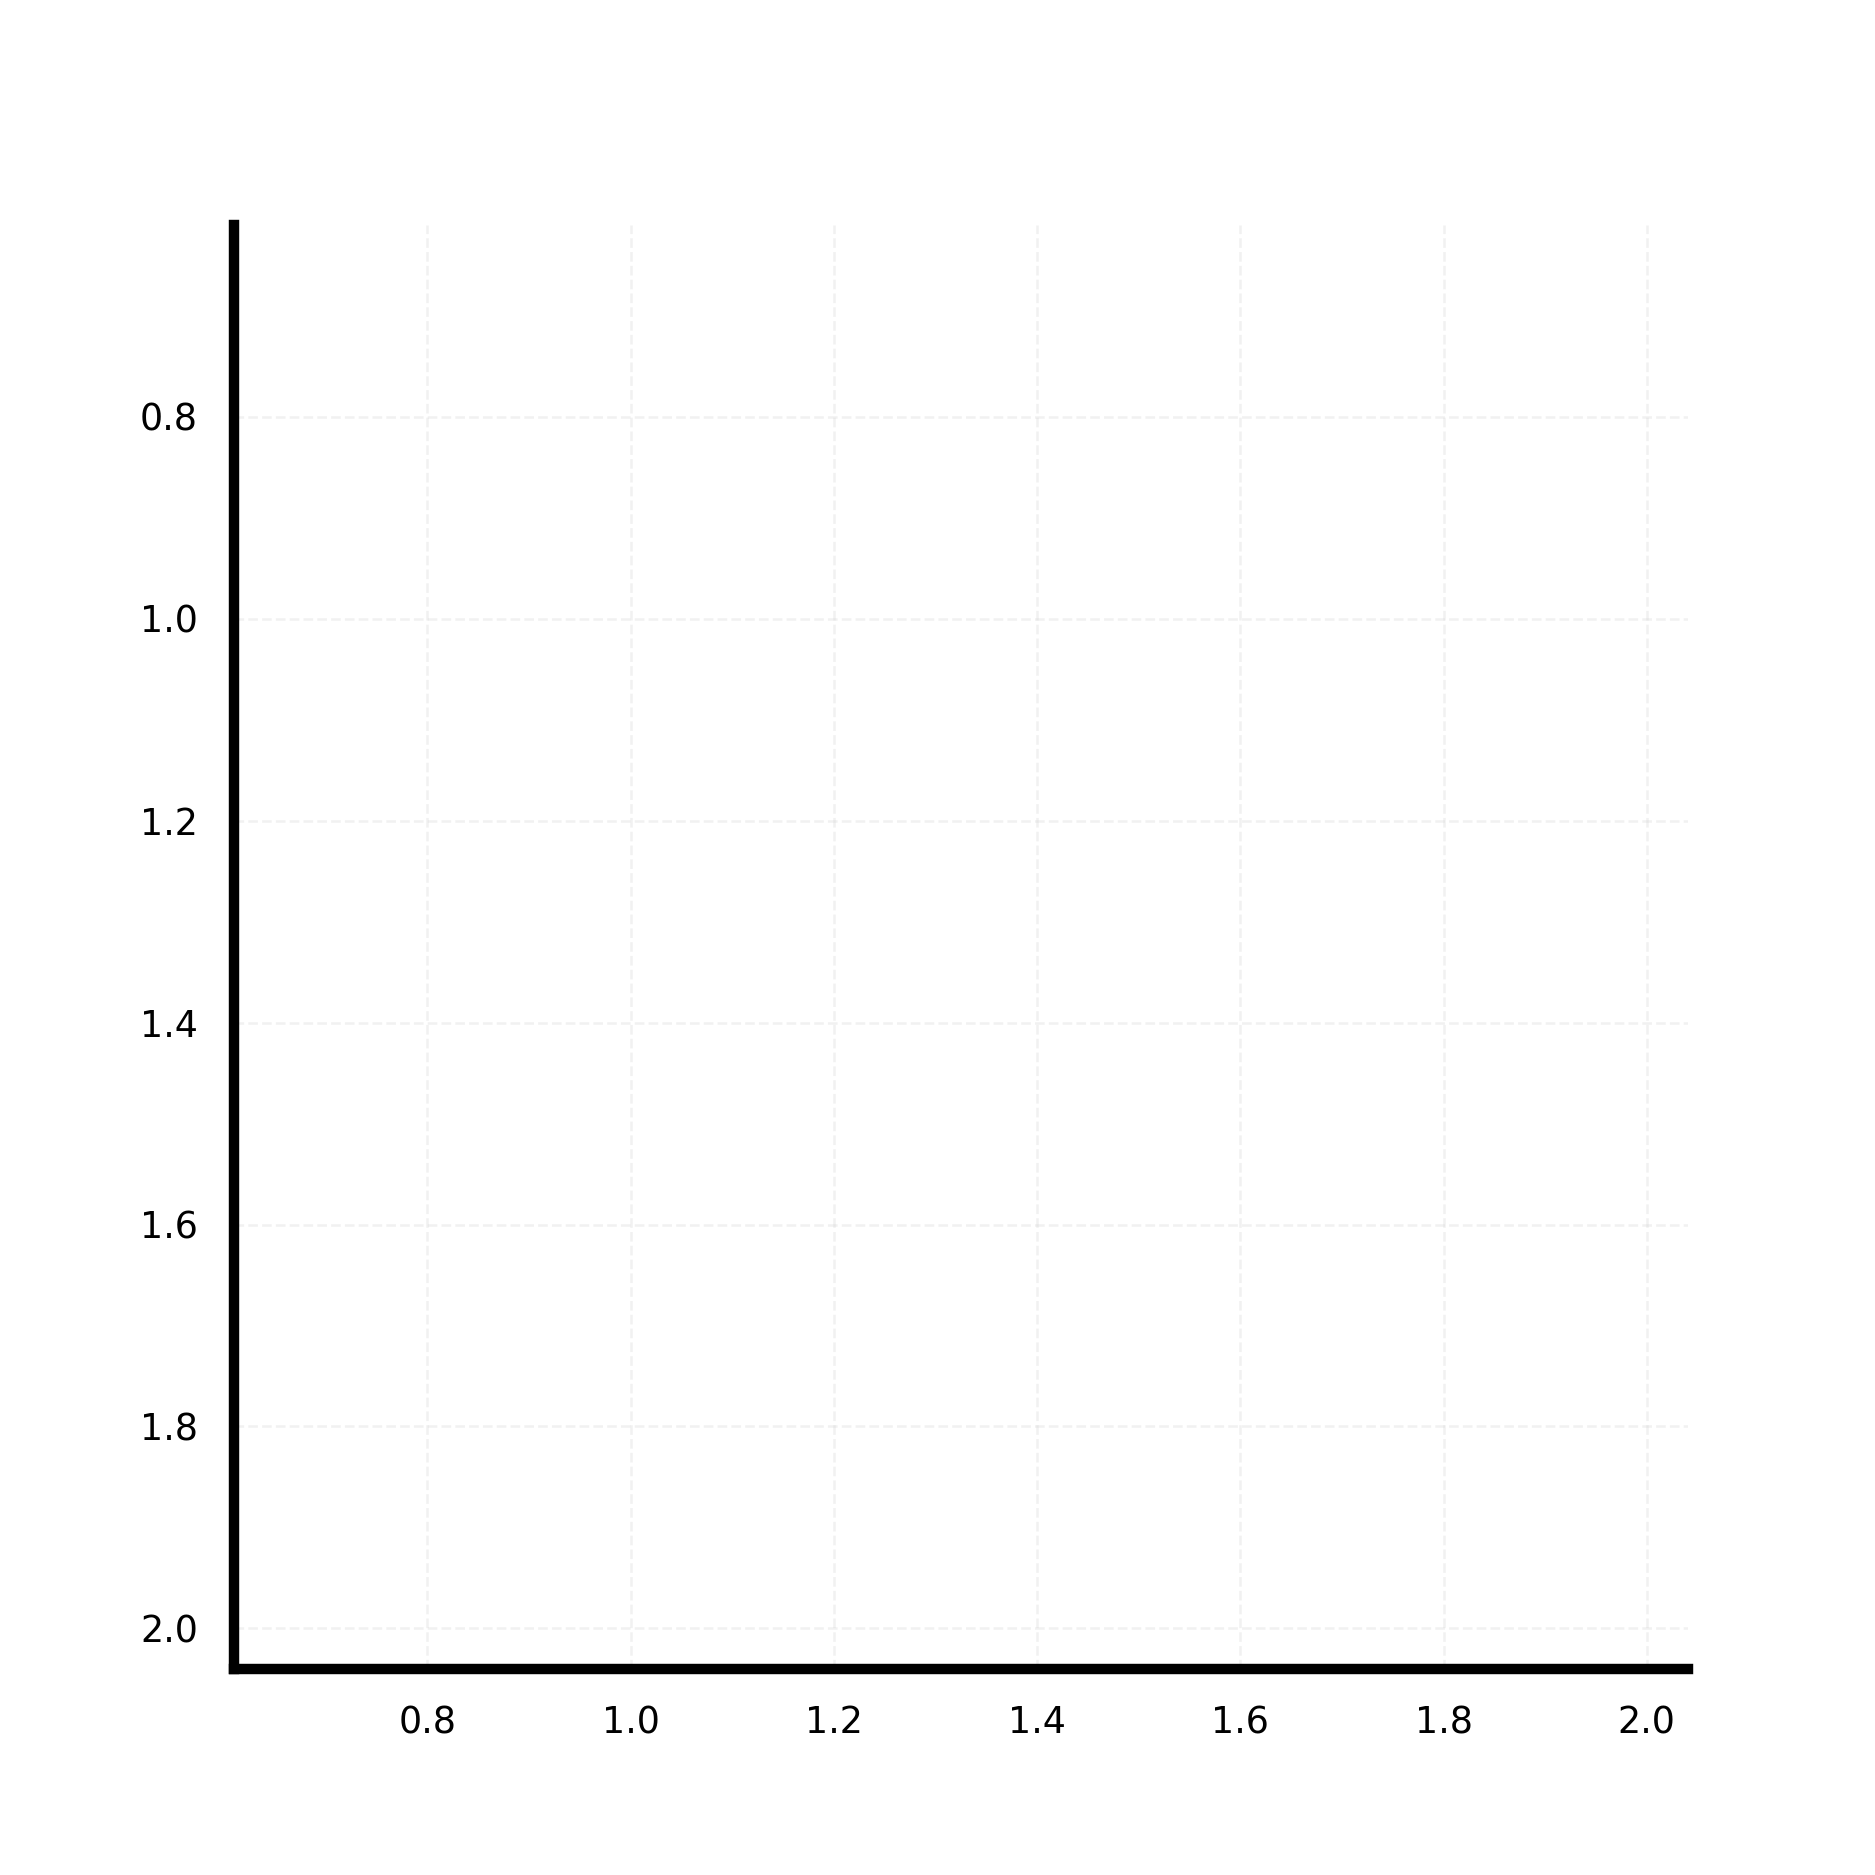

In [4]:
plt.style.use('style/comet_chart_style.mplstyle')
fig = plt.figure(figsize=(5, 5), dpi=300)
ax = plt.subplot()

# Set symmetric axis bounds (and add a little padding)
min_ = min(df['npxG90_2023'].min(), df['npxGA90_2023'].min(), df['npxG90_2022'].min(), df['npxGA90_2022'].min()) - .1
max_ = max(df['npxG90_2023'].max(), df['npxGA90_2023'].max(), df['npxG90_2022'].max(), df['npxGA90_2022'].max()) + .1

ax.set_xlim(min_, max_)
ax.set_ylim(min_, max_)

# Invert y axis 
plt.gca().invert_yaxis()

ax.tick_params(top=False, bottom=False, left=False, right=False)

Define a function to plot comets

In [5]:
def plot_comet(team_name, starting_x, starting_y, ending_x, ending_y):
    # Get style properties of the team
    team_style = team_styles.get(team_name)
    # Plot the circle
    ax.scatter(
        ending_x, ending_y,
        alpha=1, lw=1, ec=team_style['outer_color'], fc=team_style['inner_color'],
        zorder=3, s=350
    )
    # Add team label
    ax.text(ending_x, ending_y + 0.001, team_style['label'], horizontalalignment='center', font=third_font_name, size=5,
            weight='bold', verticalalignment='center')
    
    # Plot the tail
    plt.annotate(xy=(starting_x, starting_y), xytext=(ending_x, ending_y), text="", size=6, alpha=0.9, zorder=2,
                 arrowprops=dict(arrowstyle="wedge,shrink_factor=0.4,tail_width=0.6", ec=team_style['outer_color'],
                                 fc=team_style['inner_color']))

Plotting comets and final touches 

<IPython.core.display.Javascript object>


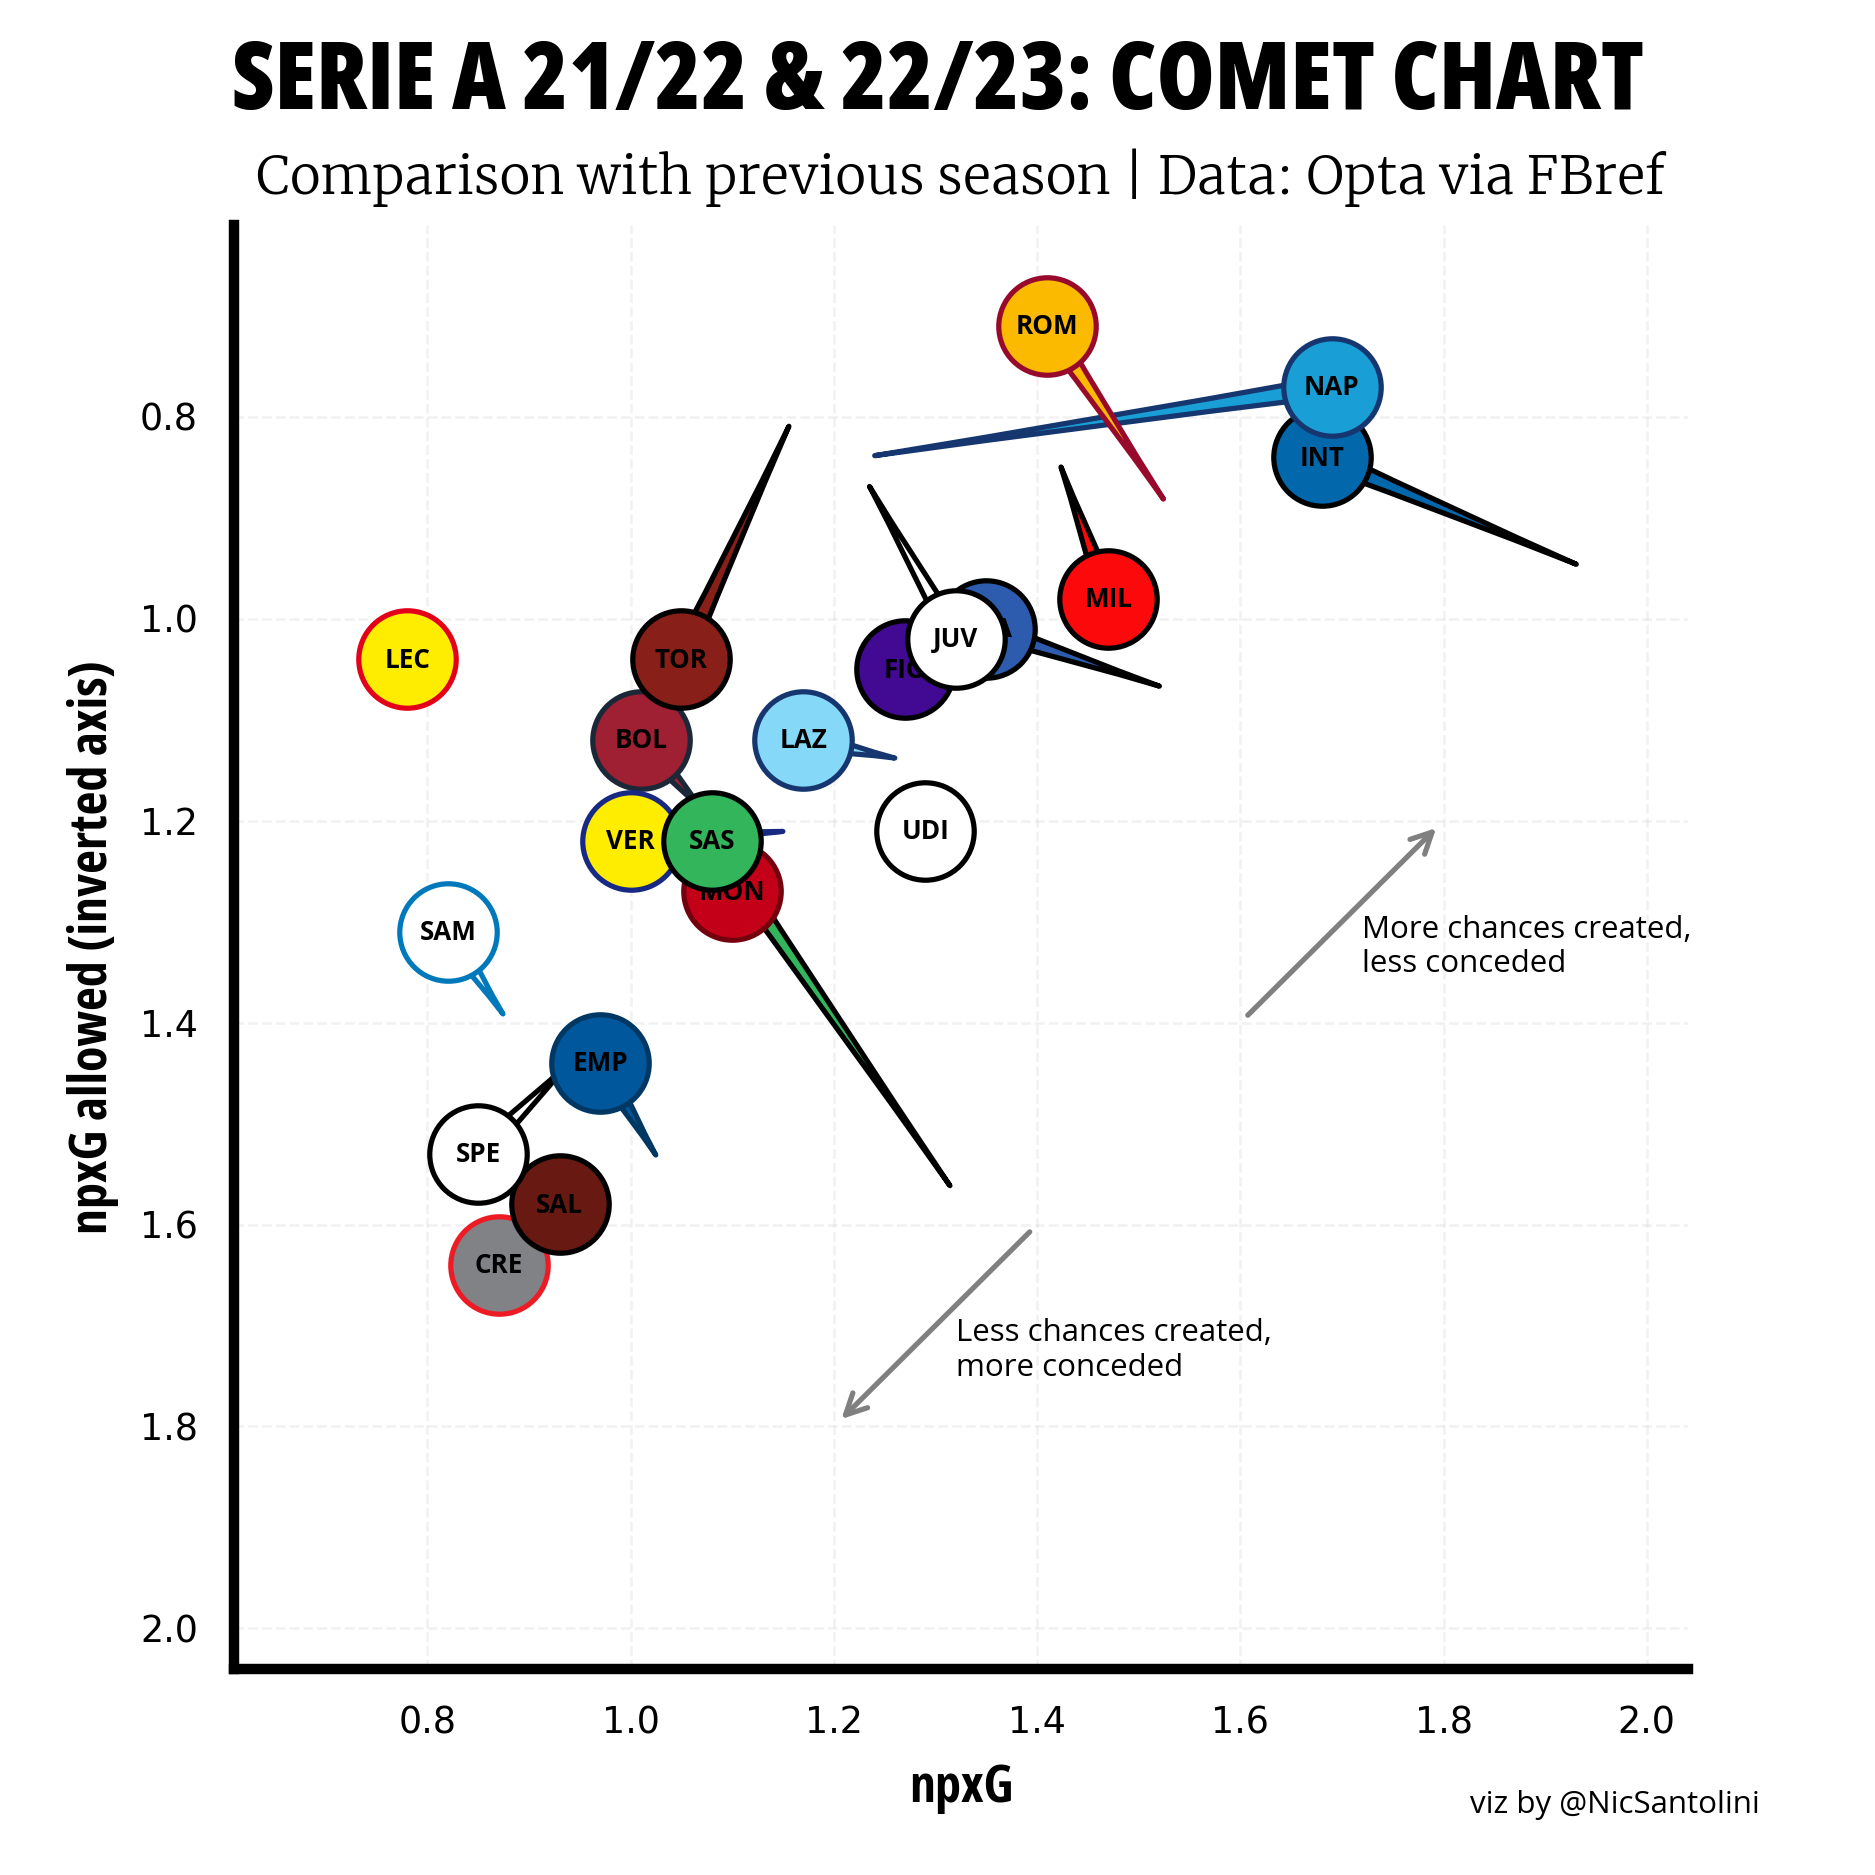

In [102]:
fig = plt.figure(figsize=(5, 5), dpi=300)
ax = plt.subplot()

# Set symmetric axis bounds (and add a little padding)
min_ = min(df['npxG90_2023'].min(), df['npxGA90_2023'].min(), df['npxG90_2022'].min(), df['npxGA90_2022'].min()) - .1
max_ = max(df['npxG90_2023'].max(), df['npxGA90_2023'].max(), df['npxG90_2022'].max(), df['npxGA90_2022'].max()) + .1

ax.set_xlim(min_, max_)
ax.set_ylim(min_, max_)

# Invert y axis 
plt.gca().invert_yaxis()

ax.tick_params(top=False, bottom=False, left=False, right=False)

# Iterate on dataframe rows and plot comets
for index, row in df.iterrows():
    plot_comet(row['team_name'], row['npxG90_2022'], row['npxGA90_2022'], row['npxG90_2023'], row['npxGA90_2023'])

# FONTS
main_font_name = "open sans condensed"
secondary_font_name = "merriweather"
third_font_name = "open sans"
title_font = {'fontname': main_font_name, 'fontweight': 'heavy', 'fontsize': 18}
subtitle_font = {'fontname': secondary_font_name, 'fontweight': 'ultralight', 'fontsize': 10}
axes_label_font = {'fontname': main_font_name, 'fontweight': 'bold', 'fontsize': 10}
axes_tick_font = {'fontname': third_font_name, 'fontweight': 'normal'}

# TITLES
plt.suptitle('SERIE A 21/22 & 22/23: COMET CHART', **title_font)
plt.title(f'Comparison with previous season | Data: Opta via FBref', **subtitle_font)

# AXES LABELS
ax.set_xlabel('npxG', **axes_label_font)
ax.set_ylabel('npxG allowed (inverted axis)', **axes_label_font)


# ANNOTATIONS
ax.annotate(
            xy=(1.6, 1.4),
            xytext=(1.8, 1.2),
            text='',
            arrowprops=dict(arrowstyle='<-', color='gray')
        )
ax.text(1.72, 1.35, 'More chances created, \nless conceded', size=6, fontname=third_font_name)

ax.annotate(
            xy=(1.4, 1.6),
            xytext=(1.2, 1.8),
            text='',
            arrowprops=dict(arrowstyle='<-', color='gray')
        )

ax.text(1.32, 1.75, 'Less chances created, \nmore conceded', size=6, fontname=third_font_name)

plt.text(.85, -0.1,  s='viz by @NicSantolini', size=6, fontname=third_font_name, transform=ax.transAxes)

plt.savefig(
    f'comet.png',
    dpi=300
)